# Stock Market Aalysis Using Time series

### Stocks are of IBM company using the Alphavantage

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

### We will read date column as the datatype 'datetime'

In [3]:
# Reading the dataset
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
stocks_df = pd.read_excel("stocks.xlsx", parse_dates=['date'], date_parser=d_parser)
stocks_df.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2021-06-24,145.80,146.19,144.69,145.44,3597137
1,2021-06-23,146.43,146.50,144.57,144.61,3202644
2,2021-06-22,146.52,146.81,145.35,146.36,2437121
3,2021-06-21,144.11,147.07,144.06,146.65,4285711
4,2021-06-18,144.48,144.68,143.04,143.12,9156505


In [4]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5447 entries, 0 to 5446
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       5447 non-null   datetime64[ns]
 1   1. open    5447 non-null   float64       
 2   2. high    5447 non-null   float64       
 3   3. low     5447 non-null   float64       
 4   4. close   5447 non-null   float64       
 5   5. volume  5447 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 255.5 KB


In [5]:
stocks_df.shape

(5447, 6)

In [6]:
stocks_df = stocks_df.rename(columns={'1. open': "open", '2. high':"high", '3. low': "low", '4. close': "close", '5. volume': "volume"})

### Checking the days in each record

In [7]:
# Day name on of first record
stocks_df.loc[0, 'date'].day_name()

'Thursday'

In [8]:
stocks_df["DayOfWeek"] = stocks_df["date"].dt.day_name()

In [9]:
stocks_df.head(10)

,date,open,high,low,close,volume,DayOfWeek
0,2021-06-24,145.80,146.190,144.690,145.44,3597137,Thursday
1,2021-06-23,146.43,146.500,144.570,144.61,3202644,Wednesday
2,2021-06-22,146.52,146.810,145.350,146.36,2437121,Tuesday
3,2021-06-21,144.11,147.070,144.060,146.65,4285711,Monday
4,2021-06-18,144.48,144.680,143.040,143.12,9156505,Friday
5,2021-06-17,147.55,148.060,145.280,145.60,4367387,Thursday
6,2021-06-16,149.76,149.760,147.220,147.83,3795420,Wednesday
7,2021-06-15,149.85,149.910,148.600,149.36,2513281,Tuesday
8,2021-06-14,150.71,151.030,148.655,150.03,3344845,Monday
9,2021-06-11,150.43,151.845,150.370,151.28,3438255,Friday


### Adding Month names to the dataframe

In [10]:
stocks_df.head(10)

,date,open,high,low,close,volume,DayOfWeek
0,2021-06-24,145.80,146.190,144.690,145.44,3597137,Thursday
1,2021-06-23,146.43,146.500,144.570,144.61,3202644,Wednesday
2,2021-06-22,146.52,146.810,145.350,146.36,2437121,Tuesday
3,2021-06-21,144.11,147.070,144.060,146.65,4285711,Monday
4,2021-06-18,144.48,144.680,143.040,143.12,9156505,Friday
5,2021-06-17,147.55,148.060,145.280,145.60,4367387,Thursday
6,2021-06-16,149.76,149.760,147.220,147.83,3795420,Wednesday
7,2021-06-15,149.85,149.910,148.600,149.36,2513281,Tuesday
8,2021-06-14,150.71,151.030,148.655,150.03,3344845,Monday
9,2021-06-11,150.43,151.845,150.370,151.28,3438255,Friday


In [11]:
years = []
months = []
days = []

for time in stocks_df["date"].astype(str): 
    years.append(time.split('-')[0])
    months.append(time.split('-')[1])
    days.append(time.split('-')[2])

In [12]:
stocks_df["year"] = years
stocks_df['month'] = months
stocks_df['days'] = days

### The dataset contains 5447 records now lets us take all the records of one year till now

In [13]:
stocks_df[stocks_df["date"] == "2019-07-01"]

,date,open,high,low,close,volume,DayOfWeek,year,month,days
500,2019-07-01,139.6,141.49,139.28,139.88,3387184,Monday,2019,07,01


In [14]:
df = stocks_df.iloc[:500, ]

In [15]:
print(df.shape)
print(df.head())

(500, 10)
        date    open    high     low   close   volume  DayOfWeek  year month  \
0 2021-06-24  145.80  146.19  144.69  145.44  3597137   Thursday  2021    06   
1 2021-06-23  146.43  146.50  144.57  144.61  3202644  Wednesday  2021    06   
2 2021-06-22  146.52  146.81  145.35  146.36  2437121    Tuesday  2021    06   
3 2021-06-21  144.11  147.07  144.06  146.65  4285711     Monday  2021    06   
4 2021-06-18  144.48  144.68  143.04  143.12  9156505     Friday  2021    06   

  days  
0   24  
1   23  
2   22  
3   21  
4   18  


### Now we have to deal with data different from other data. As in stock prices we will only be given date and we have to predict all the other ourselves.

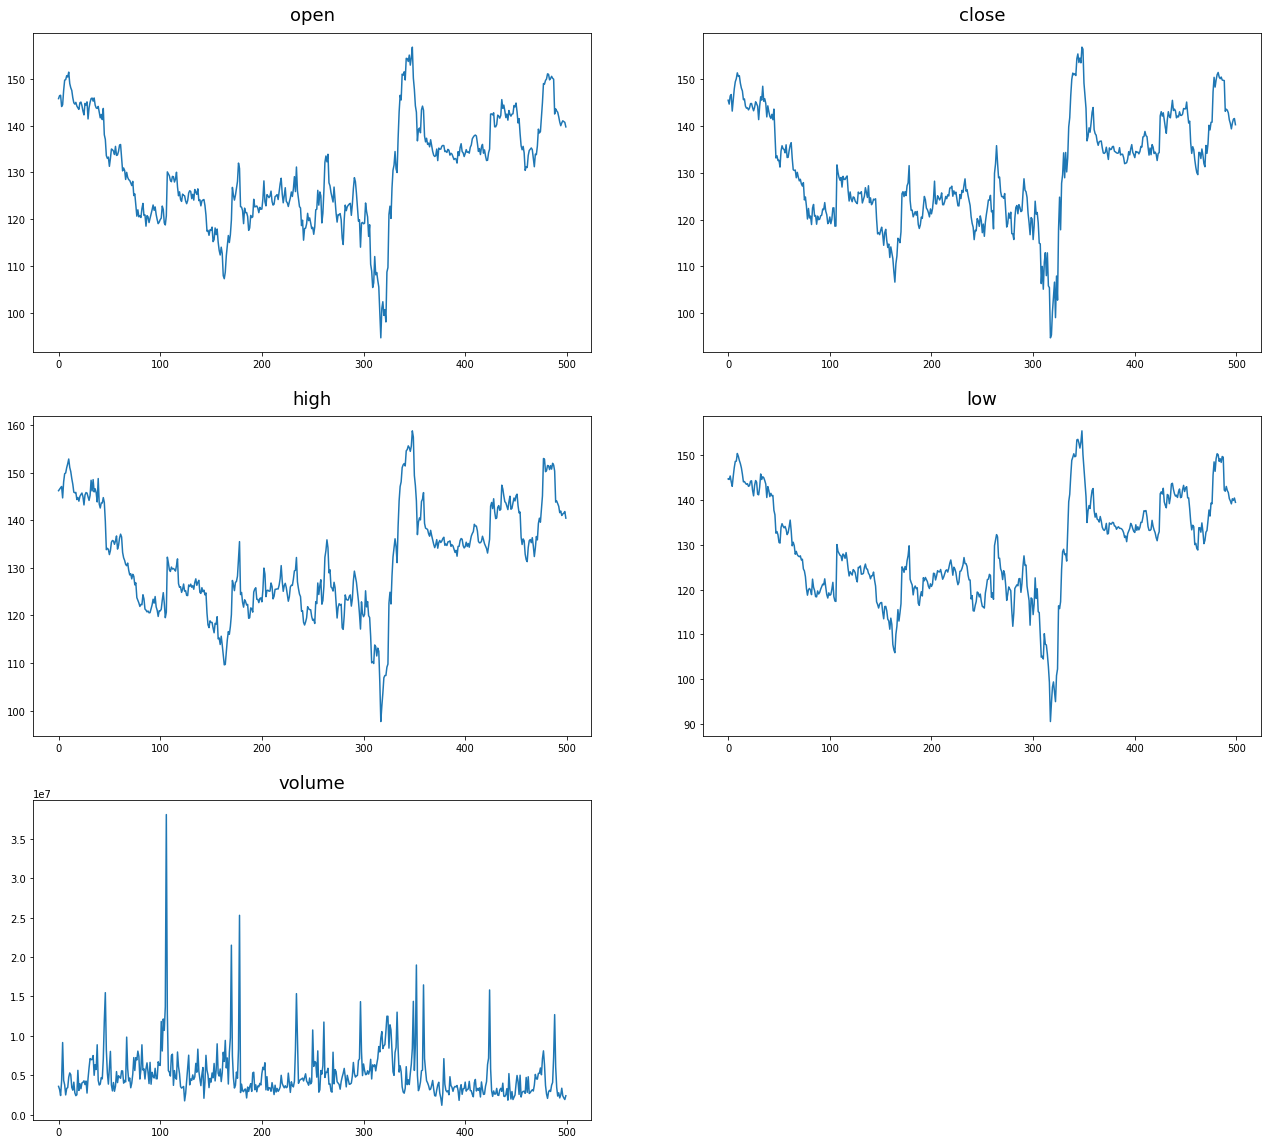

In [21]:
# plt.figure(figsize = (15, 5))
# plt.plot(df["open"])

fig, axs = plt.subplots(3, 2)

# axs[0][0].plot(df["open"])
# axs[0][1].plot(df["close"])
# axs[1][0].plot(df["high"])
# axs[1][1].plot(df["low"])
# axs[2][0].plot(df["volume"])
# plt.delaxes(ax = axs[2][1])

labels = [["open", "close"],
          ["high", "low"],
          ["volume"]]

for m in range(3):
    
    for n in range(2):
        
        if m == 2 and n == 1:
            plt.delaxes(ax = axs[m][n])
        
        else:
            axs[m][n].plot(df[label[m][n]])
            axs[m][n].set_title(labels[m][n], size = 18, y = 1.02)
            
plt.gcf().set_size_inches(22, 20)

### Visualizing monthly data

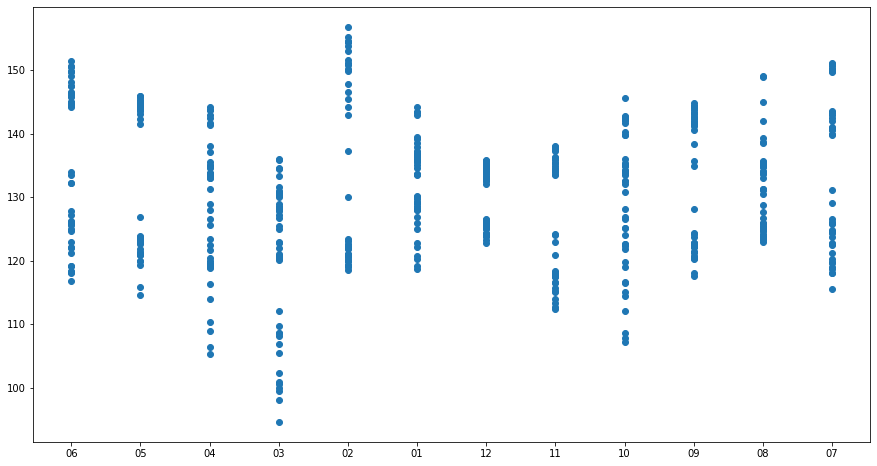

In [18]:
plt.figure(figsize = (15, 8))
plt.scatter(y = df["open"], x = df["month"])

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

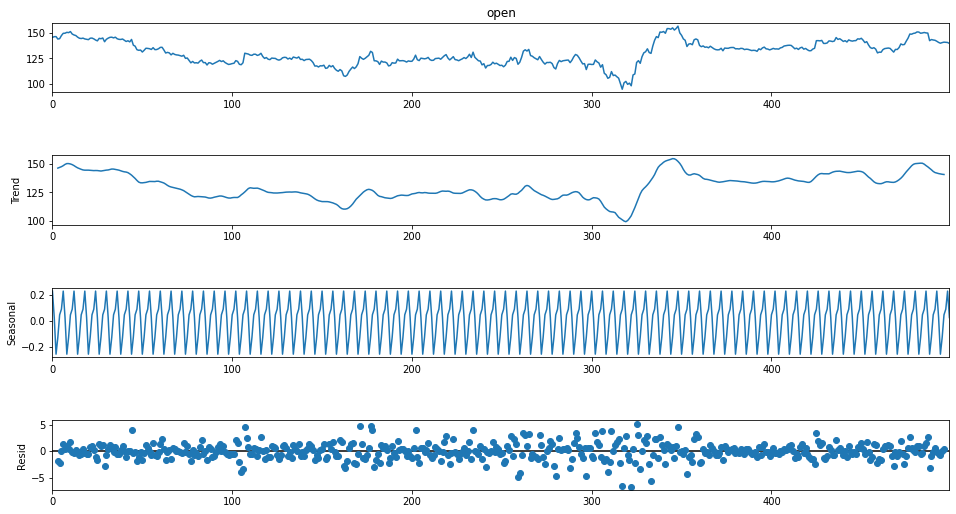

In [20]:
decompose_stocks = seasonal_decompose(df["open"],period=6)
decompose_stocks.plot()
plt.gcf().set_size_inches(15, 8)
plt.show()